In [1]:
import sys
sys.path.append('../')

from lib.am_utils import *
from lib.mol_functions import *
import lib.consts as c

# from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
pd.set_option('expand_frame_repr', False)

import time

#### The Hamiltonian
\begin{equation}
H=H_\text{rot}+H_\text{hf}+H_\text{S}+H_\text{Z}
\end{equation}
where
\begin{equation}
H_\text{rot} = B_v\mathbf{N}^2-D_v\mathbf{N}^2\mathbf{N}^2
\end{equation}

\begin{equation}
H_\text{hf} = \sum_{i=1}^2\mathbf{V}_i\cdot\mathbf{Q}_i + \sum_{i=1}^2c_i\mathbf{N}\cdot\mathbf{I}_i + c_3\mathbf{I}_i\cdot\mathbf{T}\cdot\mathbf{I}_2+c_4\mathbf{I}_1\cdot\mathbf{I}_2
\end{equation}

\begin{equation}
H_S = -\mathbf{\mu}\cdot\mathbf{E}
\end{equation}

\begin{equation}
H_Z = -g_r\mu_N\mathbf{N}\cdot\mathbf{B} - \sum_{i=1}^2g_i\mu_N\mathbf{I}_i\cdot\mathbf{B}(1-\sigma_i)
\end{equation}

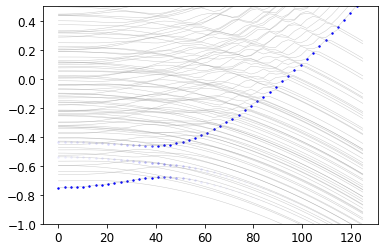

In [2]:
# tic = time.perf_counter()

p = p0s['RbCs'].copy()
p['N'] = arange(0,2)
p['E_td_00'] = np.linspace(0,0,1)
p['B'] = np.linspace(181.5,181.5,1)
p['trap_pol'] = np.array([[0],[0],[1]])
p['E_dc'] = np.linspace(0,125,50)
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)

E_offset = 0#  -2*p['Bv']
ax = plt.subplot(1,1,1)
x = p['E_dc']
ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
plt.ylim(-1,.5)

# toc = time.perf_counter()

dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',3.5],['n',0],['m_n',0]])

# E_offset = E0[:,0].reshape(len(E0[:,0]),1) # 0 # -2*p['Bv'] # 0 # E0[0,1] # 0 # 


for i,xx in enumerate(x):
    dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
    dm_this = dm_this / np.max(dm_this)
    inds = np.argwhere(np.abs(dm_this) > 0.001)
    for j in inds:
        ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
# for i,xx in enumerate(x):
# #     dm_this = dm_val[0][i,:] # sig polarization
#     dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
#     dd = dd / np.max(dd)
#     inds = np.argwhere(dd > 0.001)
#     for j in inds:
#         ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        


# print(toc-tic)

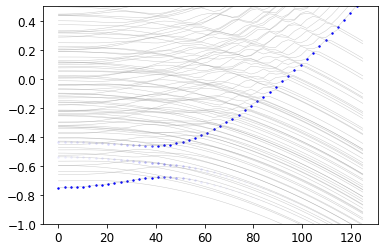

In [6]:
p = p0s['RbCs'].copy()
p['N'] = arange(0,2)
p['E_td_00'] = np.linspace(0,0,1)
p['B'] = np.linspace(181.5,181.5,1)
p['trap_pol'] = np.array([[0],[0],[1]])
p['E_dc'] = np.array([np.linspace(0,0,50),np.linspace(0,0,50),np.linspace(0,125,50)])
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)

E_offset = 0#  -2*p['Bv']
ax = plt.subplot(1,1,1)
x = p['E_dc'][2,:]
ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
plt.ylim(-1,.5)

dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',3.5],['n',0],['m_n',0]])

# E_offset = E0[:,0].reshape(len(E0[:,0]),1) # 0 # -2*p['Bv'] # 0 # E0[0,1] # 0 # 


for i,xx in enumerate(x):
    dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
    dm_this = dm_this / np.max(dm_this)
    inds = np.argwhere(np.abs(dm_this) > 0.001)
    for j in inds:
        ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
# for i,xx in enumerate(x):
# #     dm_this = dm_val[0][i,:] # sig polarization
#     dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
#     dd = dd / np.max(dd)
#     inds = np.argwhere(dd > 0.001)
#     for j in inds:
#         ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        


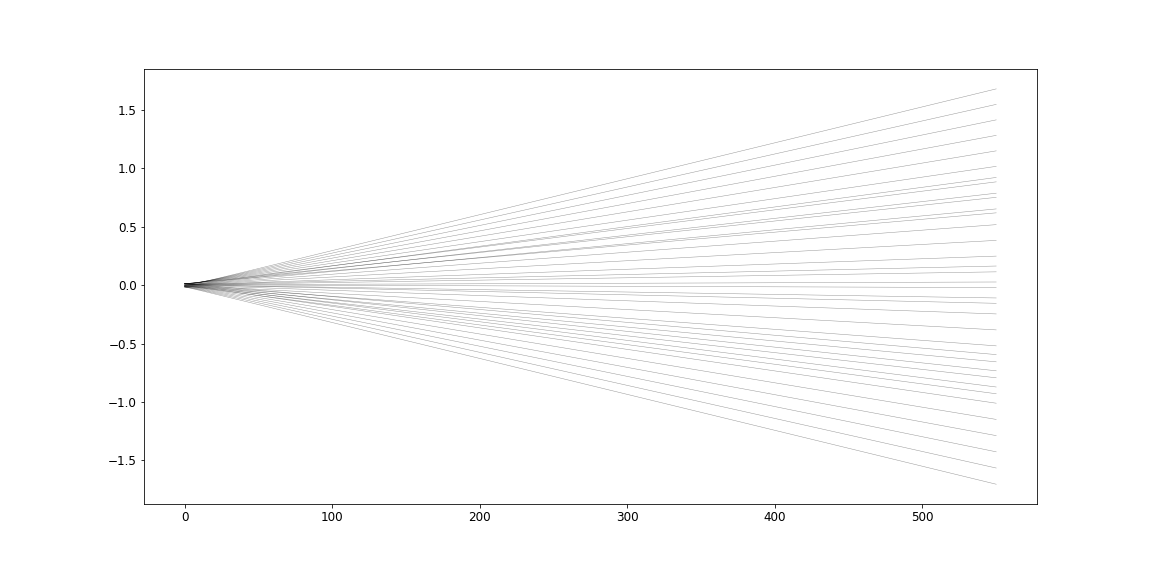

In [11]:
# tic = time.perf_counter()

p = p0s['KRb'].copy()
p['N'] = arange(0,0)
p['E_td_00'] = np.linspace(0,0,1)
p['B'] = np.linspace(0,550,100)
p['trap_pol'] = np.array([[0],[0],[1]])
p['E_dc'] = np.linspace(0,0,1)
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)

E_offset = 0#  -2*p['Bv']
plt.figure(figsize=(16,8))
# fig, ax = plt.subplots(1,1,figsize=(10,5))
x = p['B']
plt.plot(x,(E0-E_offset)/1e3,color='black',linewidth=0.5,alpha=0.4)
# plt.ylim(-1,.5)

# toc = time.perf_counter()

# dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',3.5],['n',0],['m_n',0]])

# E_offset = E0[:,0].reshape(len(E0[:,0]),1) # 0 # -2*p['Bv'] # 0 # E0[0,1] # 0 # 


# for i,xx in enumerate(x):
#     dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
#     dm_this = dm_this / np.max(dm_this)
#     inds = np.argwhere(np.abs(dm_this) > 0.001)
#     for j in inds:
#         ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
# for i,xx in enumerate(x):
# #     dm_this = dm_val[0][i,:] # sig polarization
#     dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
#     dd = dd / np.max(dd)
#     inds = np.argwhere(dd > 0.001)
#     for j in inds:
#         ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        


# print(toc-tic)